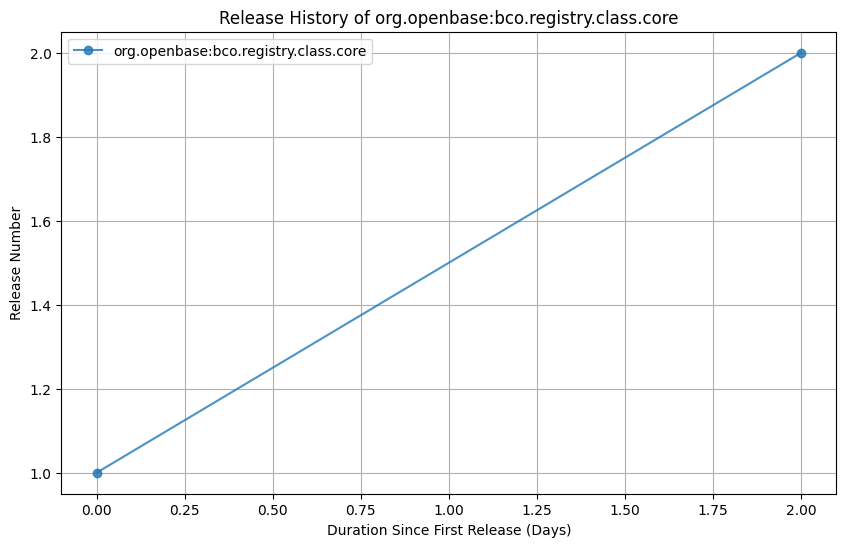

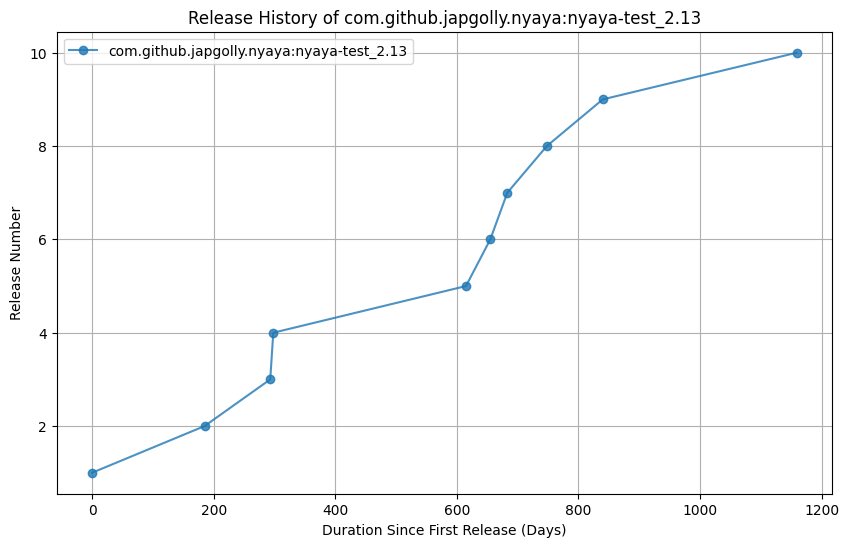

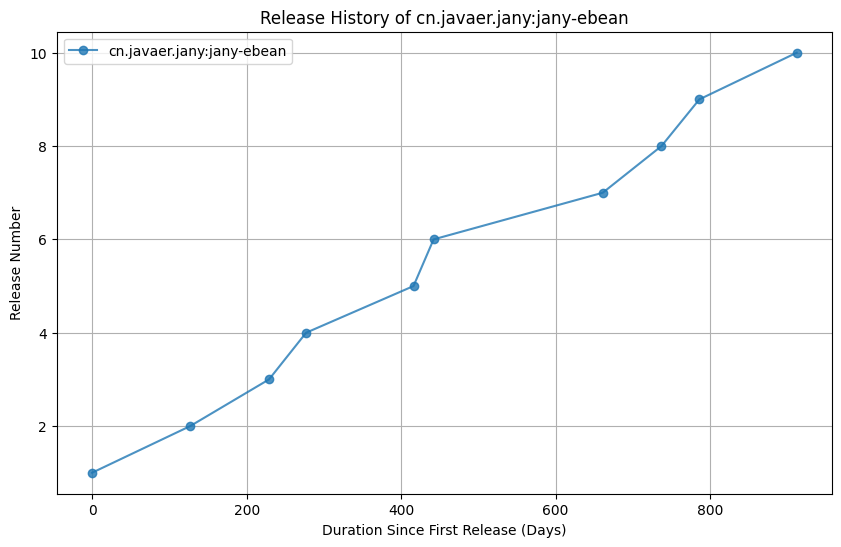

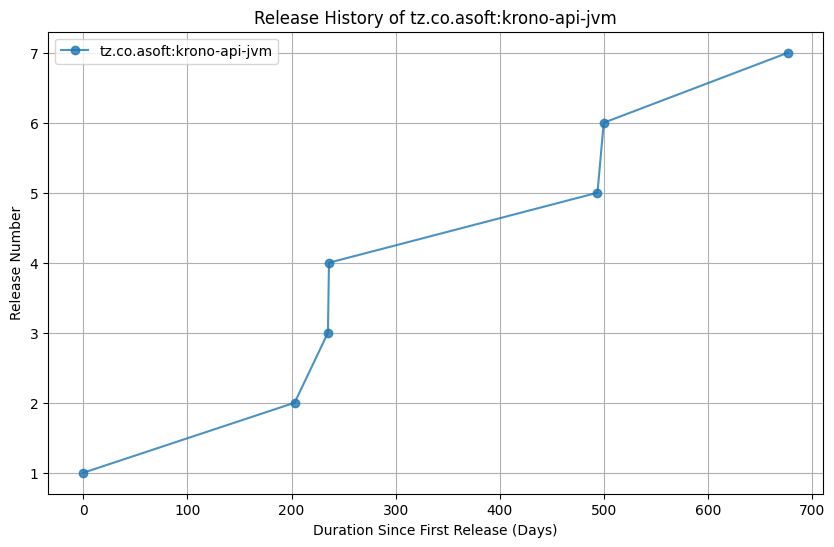

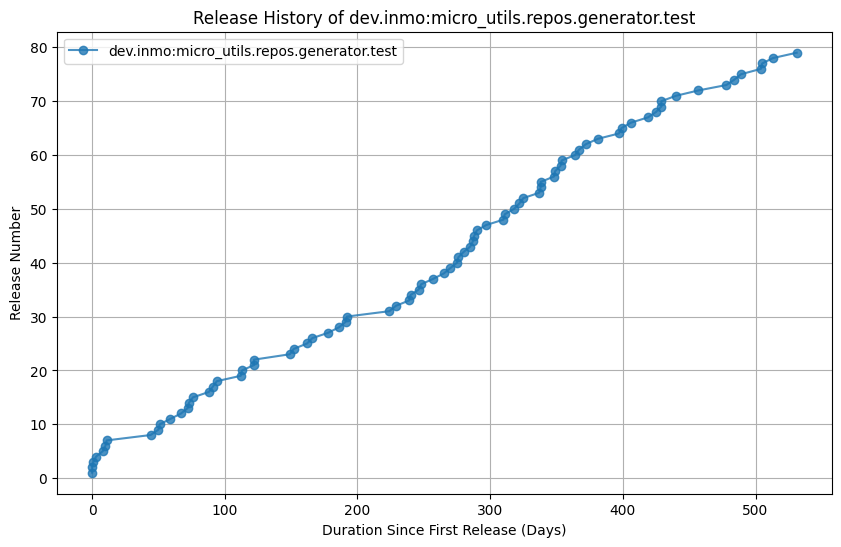

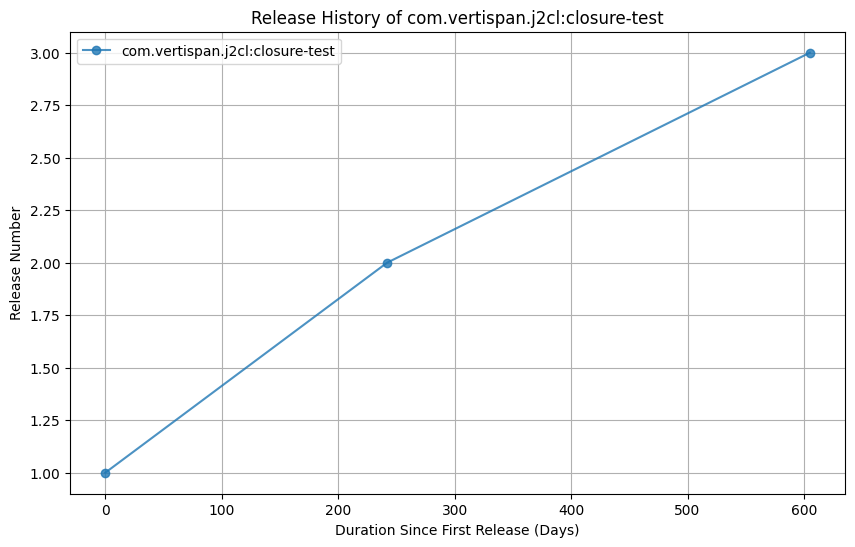

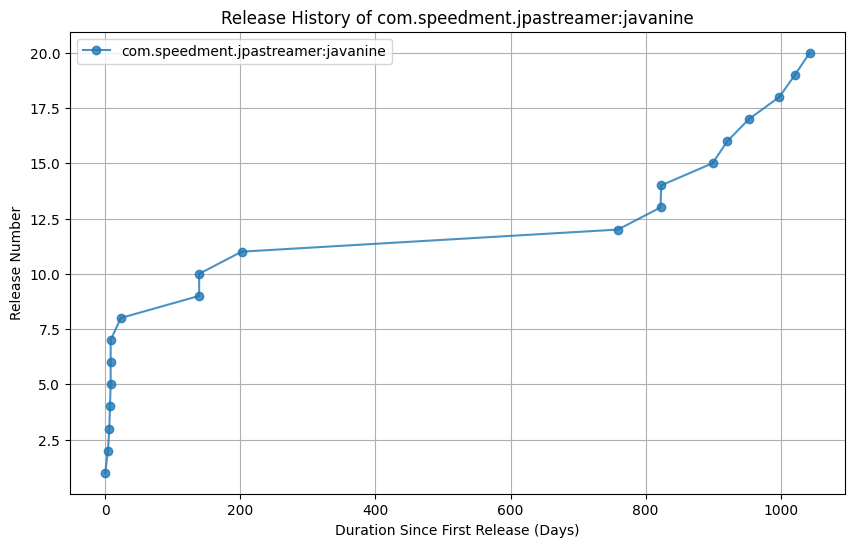

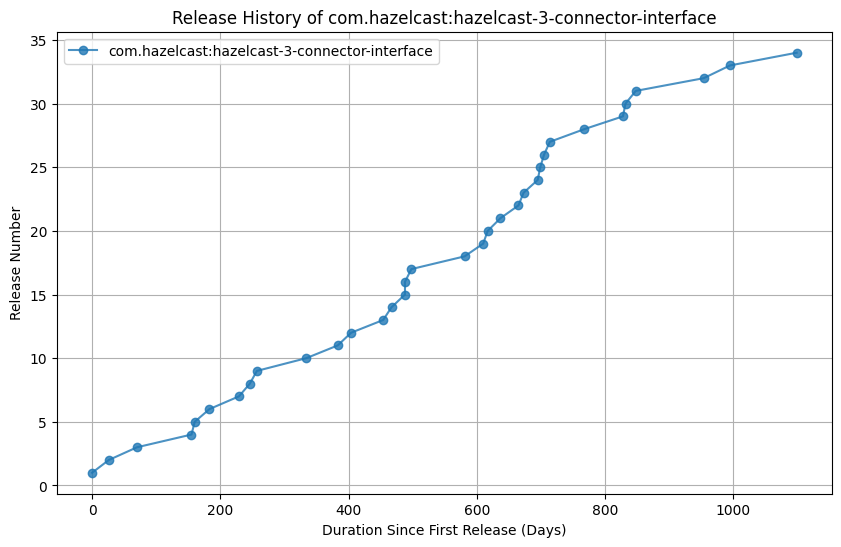

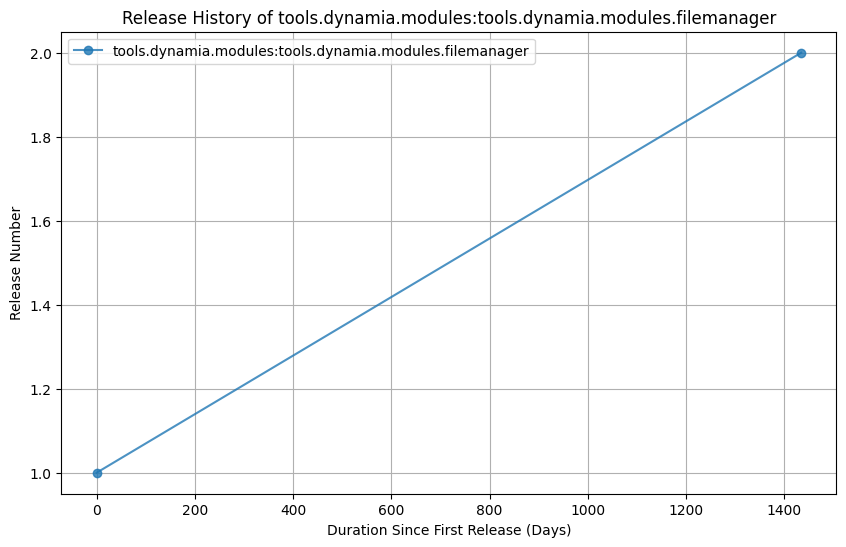

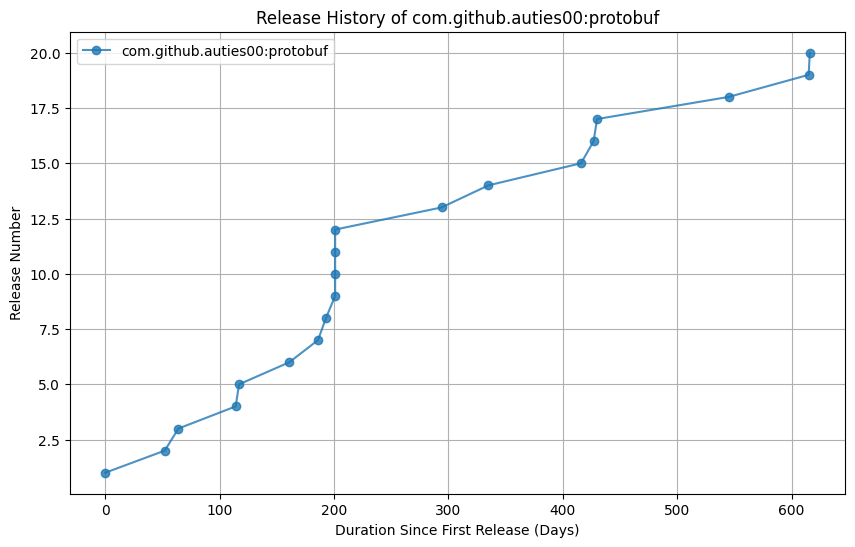

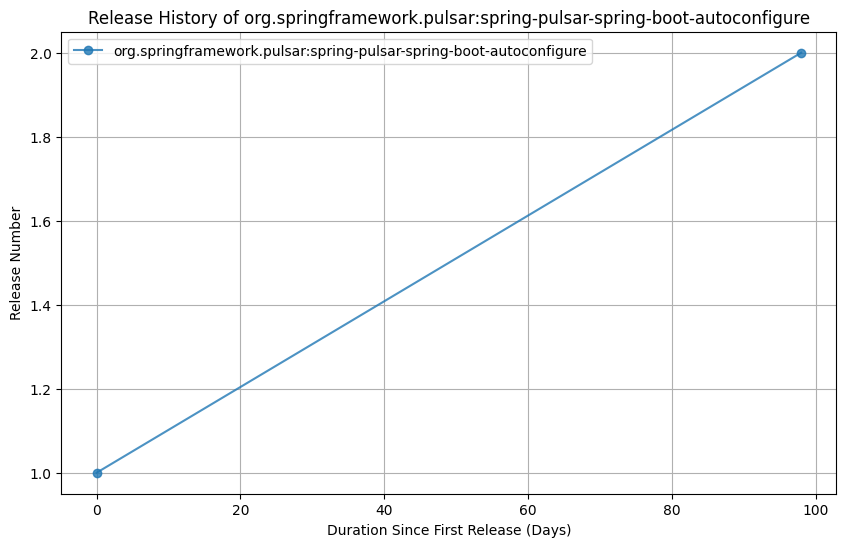

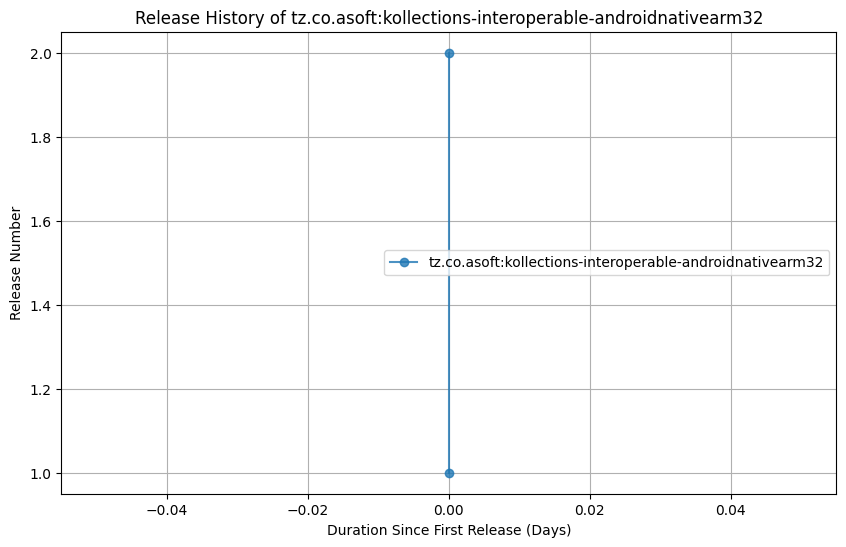

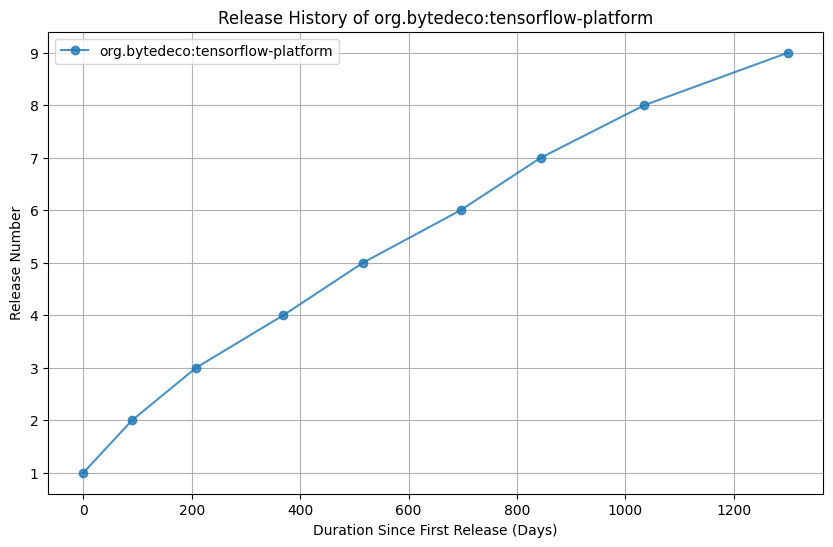

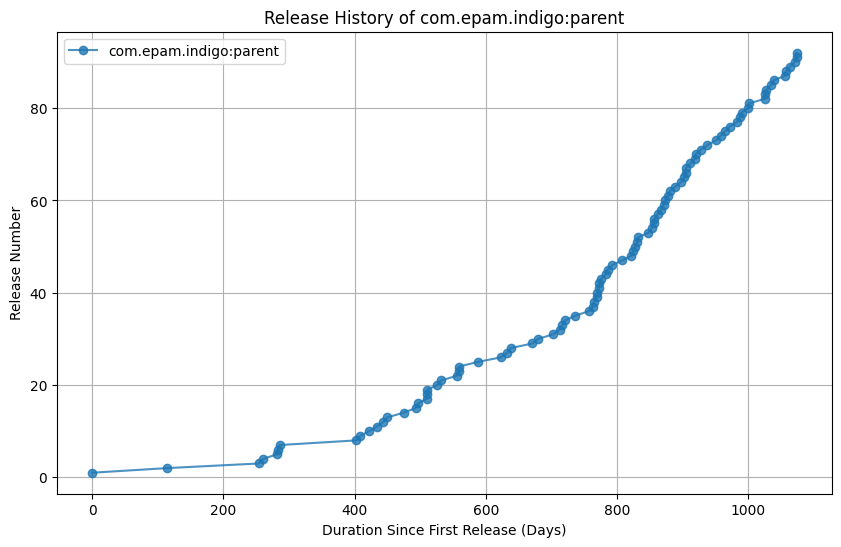

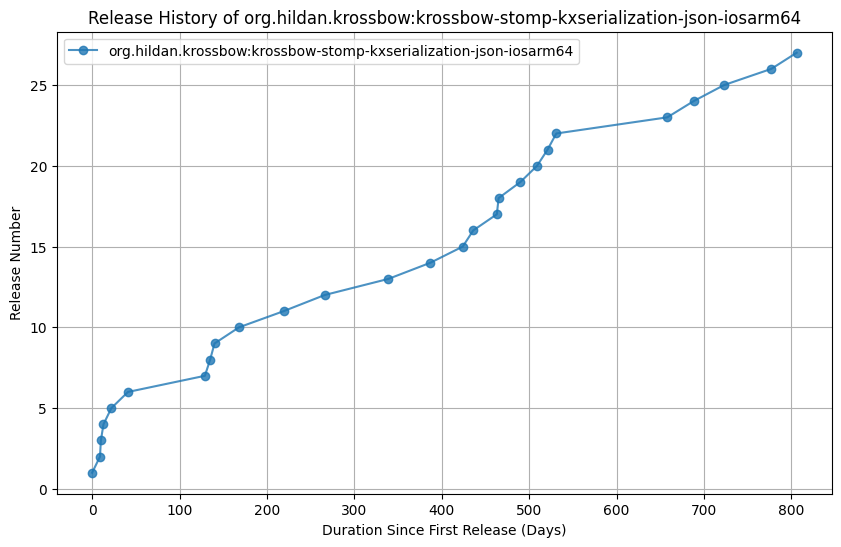

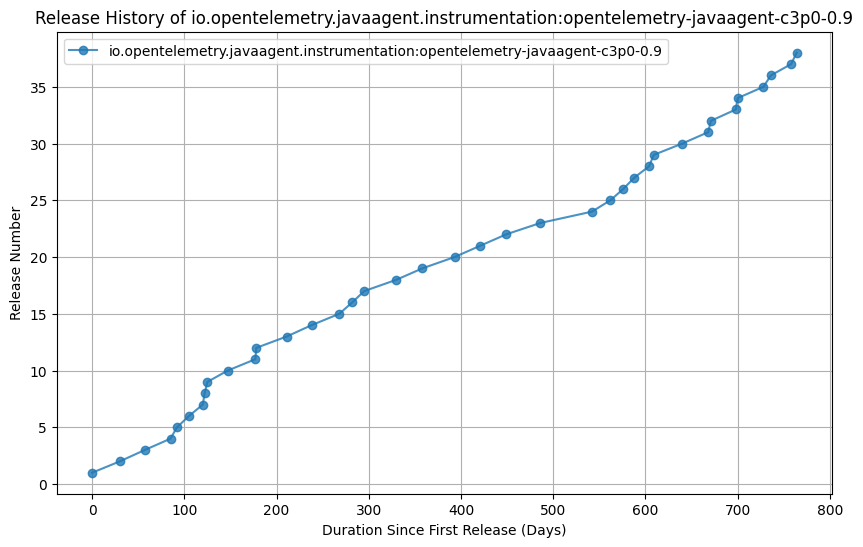

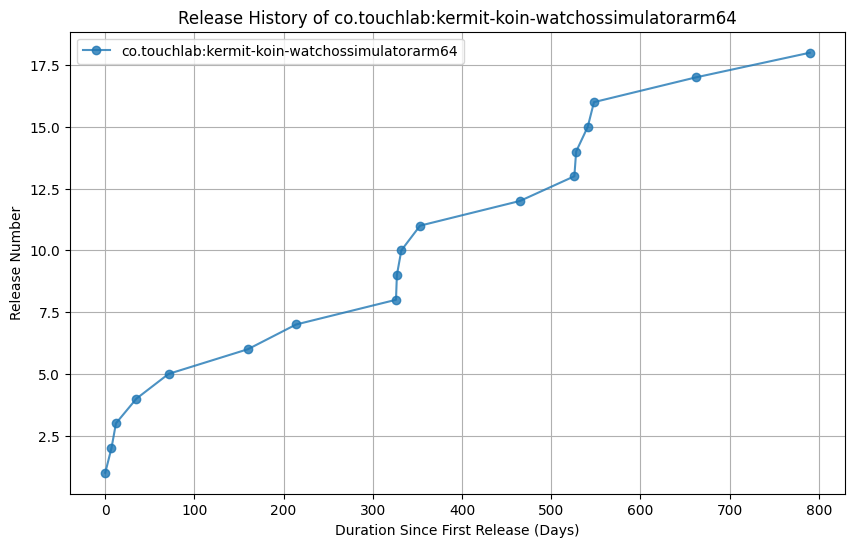

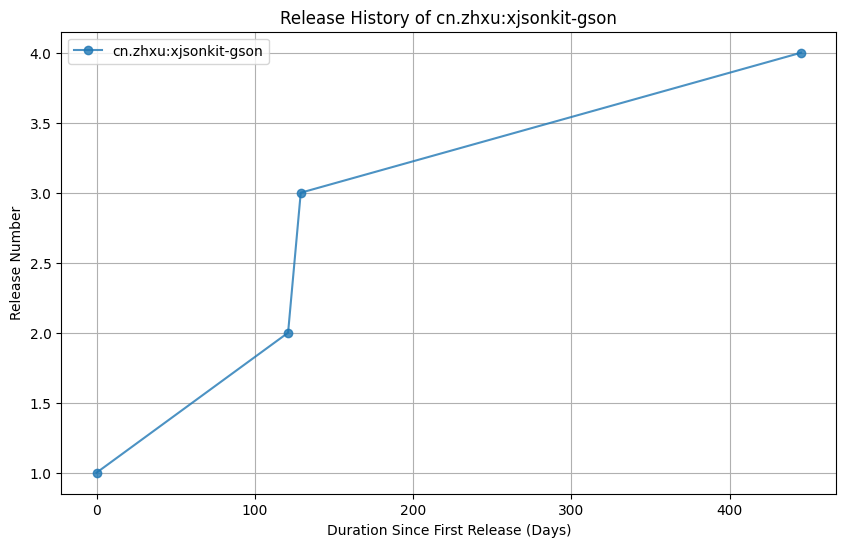

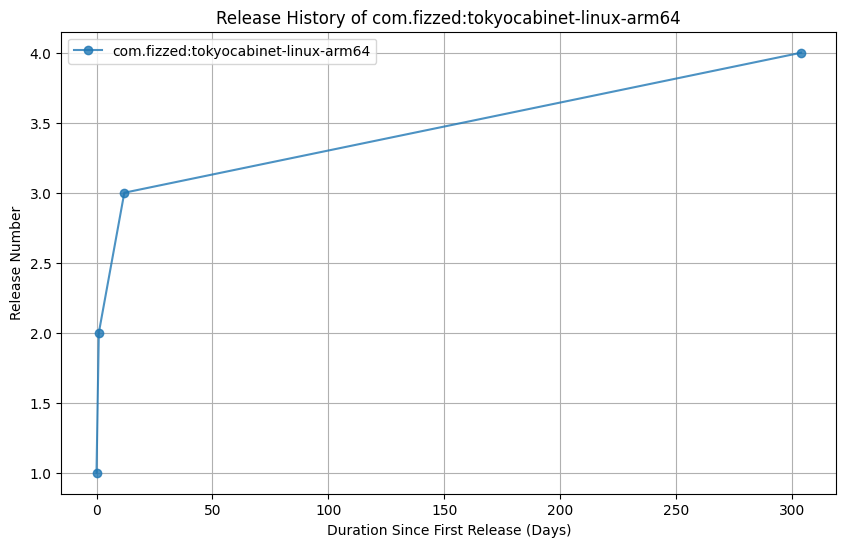

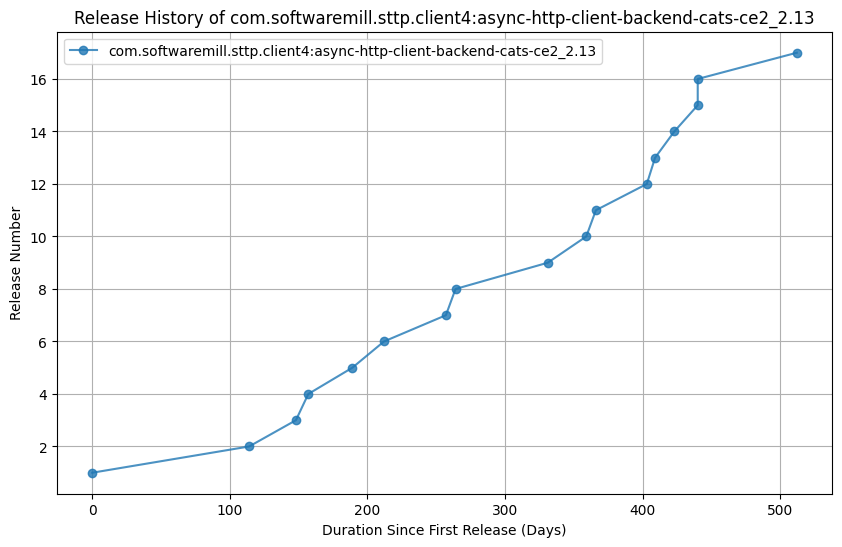

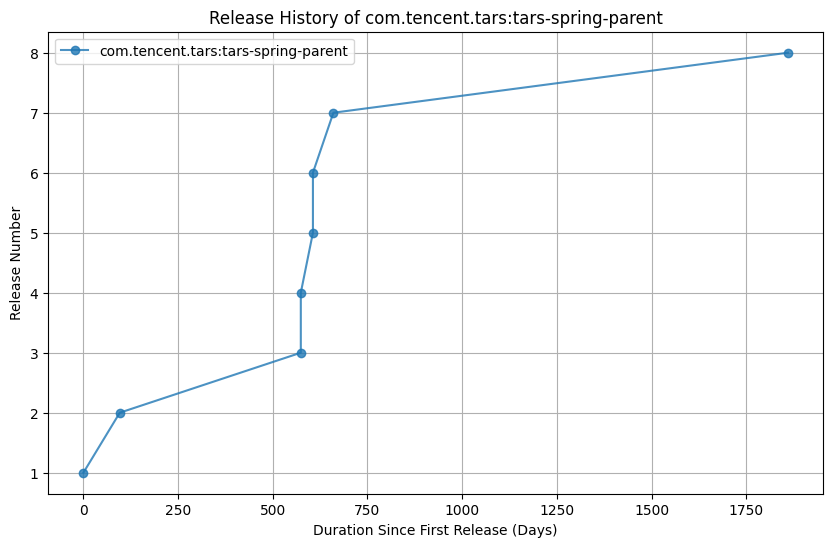

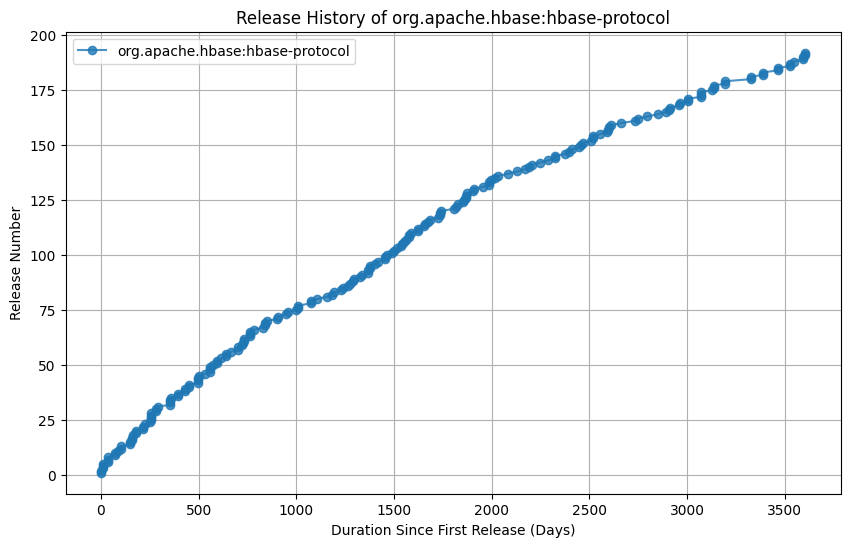

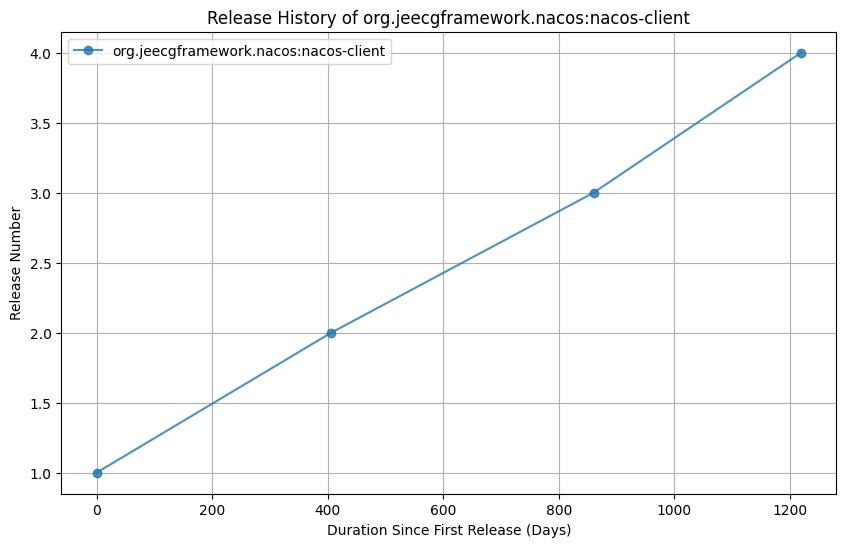

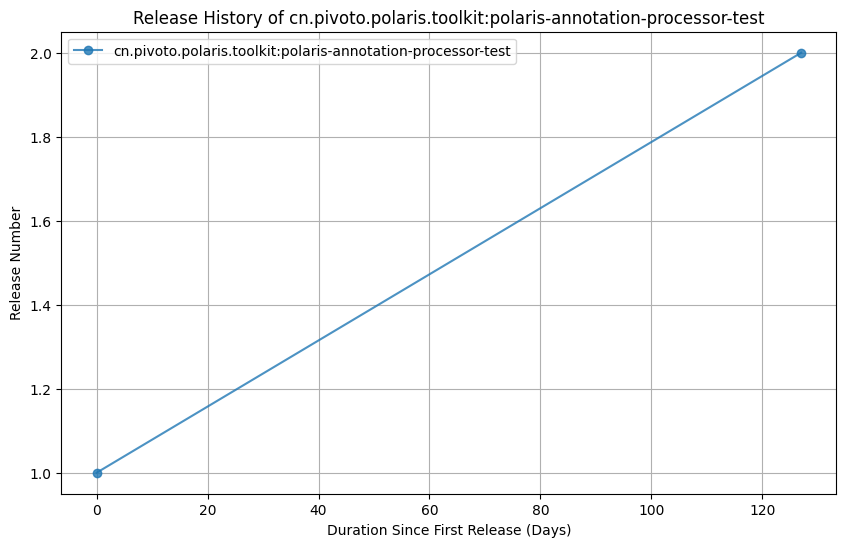

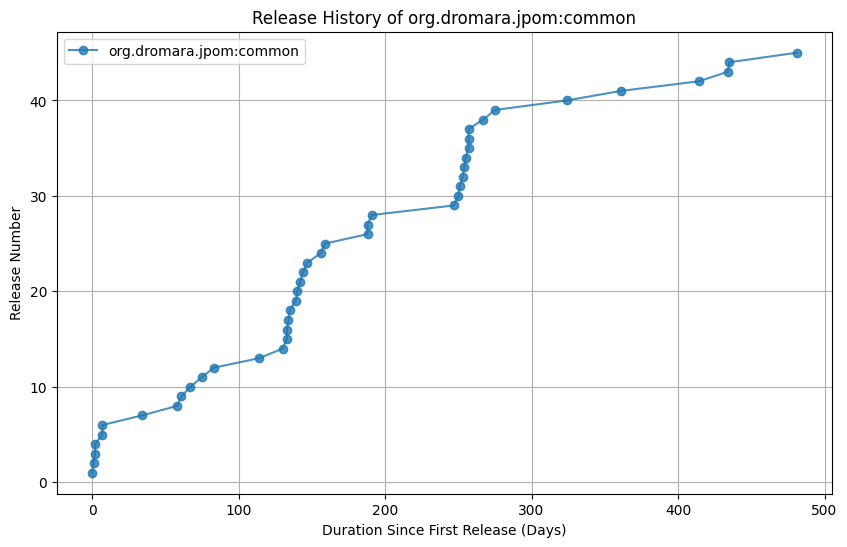

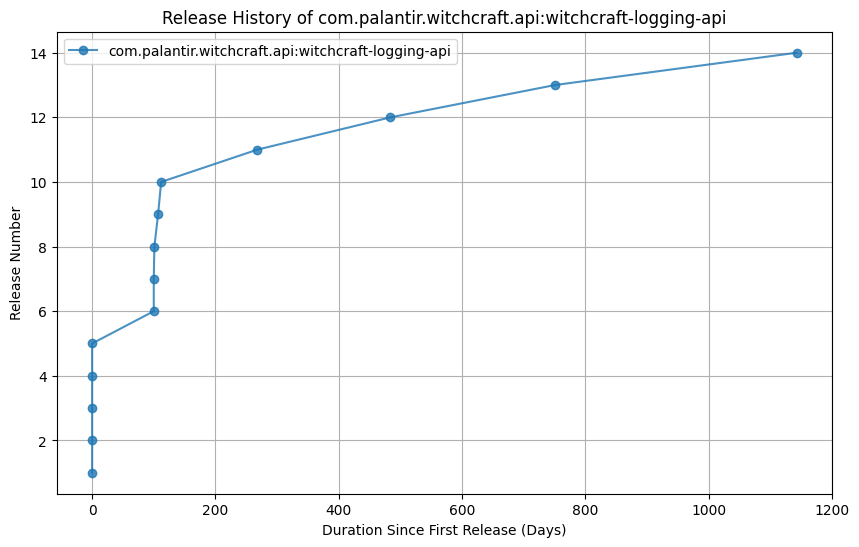

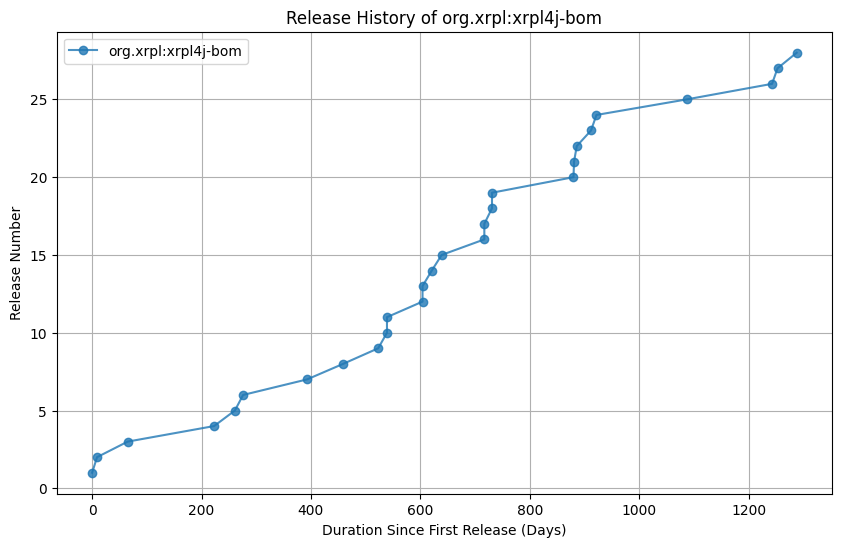

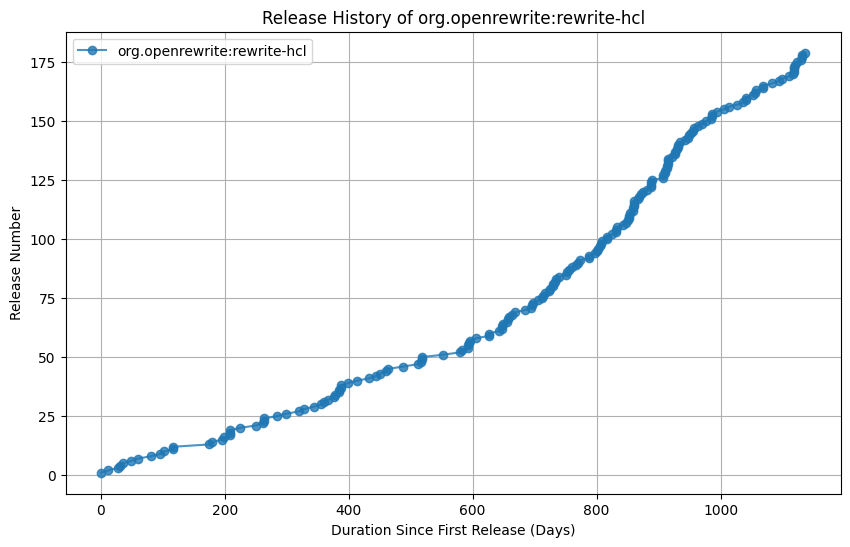

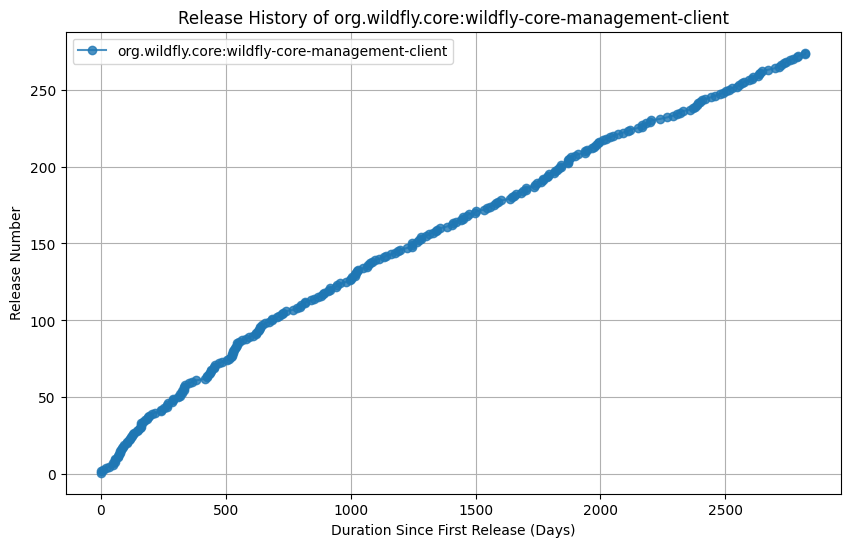

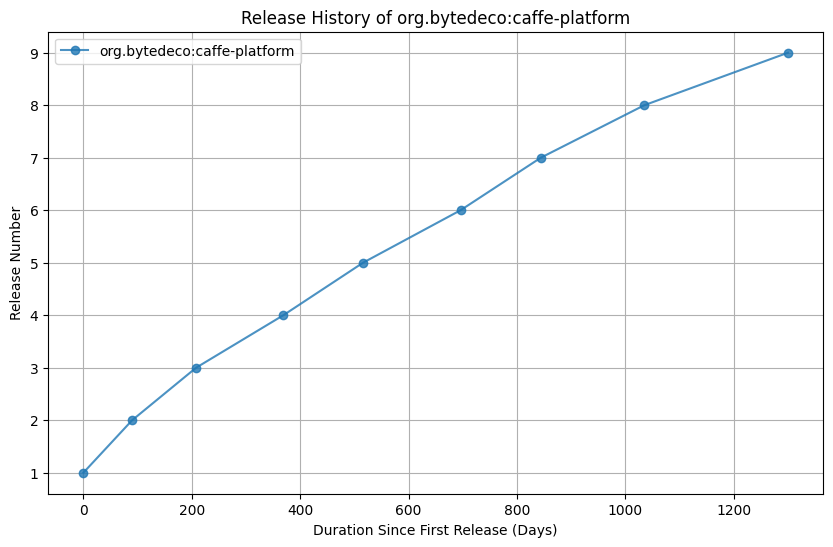

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(42)


#data_folder = '/Users/yuan/Coderepos/MSR25/'
num_sampled_library = 30

# Load the CSV file
file_path = '/Users/kaziamithasan/Desktop/Research/msr25/msr25-mining-challenge/code/active_projects_with_labels.csv'
df = pd.read_csv(file_path)

# Ensure the release date is in datetime format
df['release_timestamp'] = pd.to_datetime(df['release_timestamp'])

# Group by the project name column (assuming it's named 'library name')
grouped = df.groupby('artifact_id')

# Randomly sample k groups
group_list = list(grouped)
sampled_groups = random.sample(group_list, num_sampled_library)

# Plot each project's data
for project_name, project_data in sampled_groups:
    # Sort by release date for proper plotting
    project_data = project_data.sort_values(by='release_timestamp')
    
    # Calculate the duration since the first release in days
    project_data['duration since first release'] = (project_data['release_timestamp'] - project_data['release_timestamp'].min()).dt.days

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(project_data['duration since first release'], range(1, len(project_data) + 1), 
             marker='o', linestyle='-', alpha=0.8, label=project_name)
    plt.xlabel('Duration Since First Release (Days)')
    plt.ylabel('Release Number')
    plt.title(f'Release History of {project_name}')
    plt.grid(True)
    plt.legend()
    plt.show()